
![alt_text](euler_heston.png)


In [1]:
import numpy as np
#function to generate price path using Heston model


def Heston_Price_Path(v0,k,theta,dt,n,sigma,S0,r,rho,scheme):
    if scheme=="euler":
        bivariate_norm=np.random.multivariate_normal(mean=[0,0],cov=[[1,rho],[rho,1]],size=(n-1)) 
        vol=v0
        vol_path=np.array([vol:=vol+k*(theta-np.max(vol,0))*dt+sigma*np.sqrt(np.max(vol,0))*norm_1*np.sqrt(dt) for norm_1 in bivariate_norm[:,0]])
        vol_path=np.insert(vol_path,0,v0)
        S=S0
        price_path=np.array([S:=S+r*S*dt+S*np.sqrt(np.max(vol,0))*norm_2*np.sqrt(dt) for norm_2,vol in zip(bivariate_norm[:,1],vol_path[:-1])])
        price_path=np.insert(price_path,0,S0)
        price_vol_matrix=np.array([price_path,vol_path])
        return price_vol_matrix

#returns price_vol_matrix- first array would be price, second array would be vol


In [5]:
import pandas as pd

test_1=np.array([Heston_Price_Path(0.1,1,1,0.1,100,0.2,100,0.01,0.5,"euler") for i in range(100000)])

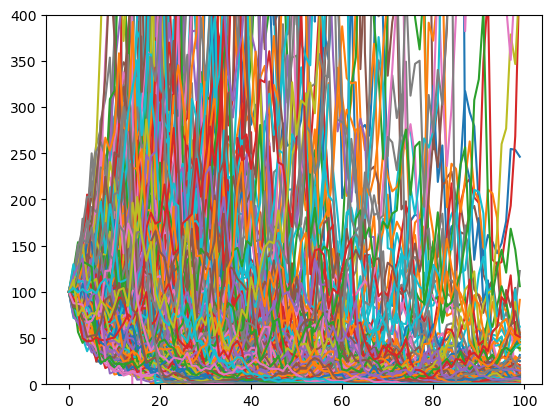

In [29]:
#print(test_1[:,0,:])

#print(test_1[:,0,:].shape)

df=pd.DataFrame(test_1[:,0,:])
x_values = np.arange(0, 100, 1)
#print(df)
import matplotlib.pyplot as plt

for i in range(300):
    plt.ylim(0,400)
    plt.plot(df.iloc[i,:])
plt.show()

In [33]:
np.mean((df.iloc[:,-1]))*np.exp(-0.01*10)


97.55895188832453

In [122]:
def LSMC(price_vol_matrix,K):
    price_matrix=price_vol_matrix[:,0,:]
    #filter out price paths that are always less than K
    ITM_paths=pd.DataFrame(price_matrix)
    
    #we use a 5 degree polynomial to estimate next day option payoff
    option
    for i in np.arange(ITM_paths.shape[1],0,-1):
        x=ITM_paths.iloc[:,i-1]
        X=pd.concat([x,x**2,x**3,x**4,x**5],axis=1)
        X.columns=["x","x^2","x^3","x^4","x^5"]
        y=ITM_paths.iloc[:,i-1]
        beta=np.linalg.inv(X.T@X)@X.T@y

        #compare predicted continuation payoff vs 


    return X


In [123]:
a=np.array([[[1,2],[1,2]],[[3,4],[3,4]],[[9,10],[9,10]]])

LSMC(a,3)


,x,x^2,x^3,x^4,x^5
0,1,1,1,1,1
1,3,9,27,81,243
2,9,81,729,6561,59049


In [124]:

for i in np.arange(a.shape[0],0,-1):
 print(i)

3
2
1
